In [ ]:
import cv2
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import pytesseract as tes
from matplotlib.backends.backend_pdf import PdfPages

In [79]:
cap = cv2.VideoCapture("Videos/Full_font2.avi")

In [ ]:
## Saving
# fps =int(cap.get(cv2.CAP_PROP_FPS))
# diap = tqdm(iterable=range(0,fps*40,fps))
# for i in diap:
#     cap.set(cv2.CAP_PROP_POS_FRAMES, i)
#     ret, frame = cap.read()
#     if ret:
#         cv2.imwrite(f"Images/frame{int(i/fps)}.jpg",frame)

In [77]:
def recognize(image,thresh):
    frame_2color = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    thresh, frame_bw = cv2.threshold(frame_2color, thresh, 255, cv2.THRESH_BINARY)
    return tes.image_to_string(frame_bw),frame_bw

In [90]:
# Check
THRESH = 147

cap = cv2.VideoCapture("Videos/Full_font2.avi")
pdf_file = PdfPages('Full_font2.pdf')

fps = int(cap.get(cv2.CAP_PROP_FPS))
diap = tqdm(iterable=range(0, fps * 40, fps))

for i in diap:
    cap.set(cv2.CAP_PROP_POS_FRAMES, i)
    ready, frame = cap.read()
    text, frame_treated = recognize(frame, thresh=THRESH)
    text = text.replace('\n','')
    text = f"t={i/fps: .1f}|{text}"
    if ready:
        fig, (ax_row, ax_treated) = plt.subplots(ncols=2)

        ax_row.imshow(frame)
        ax_treated.imshow(frame_treated)
        ax_row.text(0, 0, text, fontsize=15)
        
        fig.savefig(pdf_file, format='pdf')
        plt.close()
pdf_file.close()

100%|██████████| 40/40 [00:09<00:00,  4.19it/s]


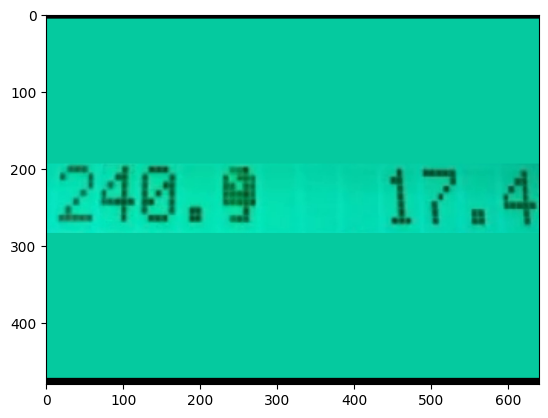

In [97]:
frame2 = frame[:,:,:]
frame2 = (frame2+1)%256
plt.imshow(frame2)

In [83]:

def crop_black_border(image):
    # Преобразование изображения в оттенки серого
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Применение порогового значения для выделения черной рамки
    _, threshold = cv2.threshold(gray, 1, 255, cv2.THRESH_BINARY)

    # Поиск контуров черной рамки
    _, contours = cv2.findContours(threshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Определение координат рамки
    x, y, w, h = cv2.boundingRect(contours[0])

    # Обрезка изображения по координатам рамки
    cropped_image = image[y:y+h, x:x+w]

    return cropped_image

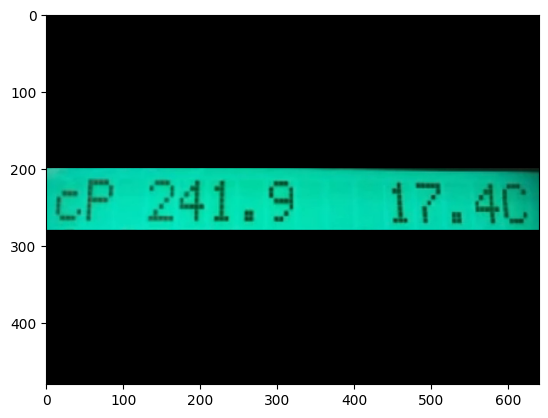

In [81]:
cap = cv2.VideoCapture("Videos/Start1.avi")
cap.set(cv2.CAP_PROP_POS_FRAMES, 0)
ready, frame = cap.read()
plt.imshow(frame)

In [84]:
plt.imshow(crop_black_border(frame))


error: OpenCV(4.8.1) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\shapedescr.cpp:874: error: (-215:Assertion failed) npoints >= 0 && (depth == CV_32F || depth == CV_32S) in function 'cv::pointSetBoundingRect'
